# Bigmart Dataset

In [1]:
 #Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loding the Dataset

In [2]:
#Import Csv file
df_bigmart= pd.read_csv('bigmart_data.csv')
df_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Give Infomation of row and column
df_bigmart.shape

(8523, 12)

In [4]:
df_bigmart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
# Datatype information of attributes
df_bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#Statical information of Data
df_bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#Unique value for each variable
df_bigmart.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Preprocessing of Dataset

In [8]:
#check null values
df_bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

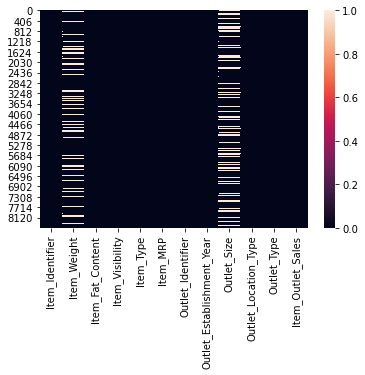

In [9]:
sns.heatmap(df_bigmart.isnull())

In [10]:
#fill the missing values
from sklearn.impute import SimpleImputer

# create instance of imputer class
imp = SimpleImputer(strategy='most_frequent')
df_bigmart['Item_Weight']=imp.fit_transform(df_bigmart['Item_Weight'].values.reshape(-1,1))
df_bigmart['Outlet_Size']=imp.fit_transform(df_bigmart['Outlet_Size'].values.reshape(-1,1))
df_bigmart['Item_Visibility']=imp.fit_transform(df_bigmart['Item_Visibility'].values.reshape(-1,1))
df_bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
sum(df_bigmart['Item_Visibility']==0)

526

In [12]:
#check for categorical attributes
cat_col = []
for x in df_bigmart.dtypes.index:
    if df_bigmart.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [13]:
#not very important data so remove it
cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
#print the categorical columns
for col in cat_col:
    print(col)
    print(df_bigmart[col].value_counts())# Function returns an object containing counts of unique values in a pandas dataframe in sorted order.
#df_bigmart.Item_Type.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


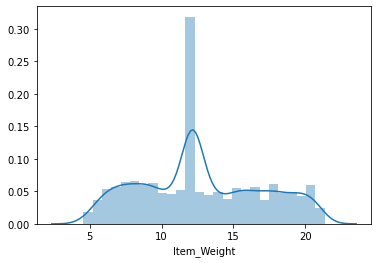

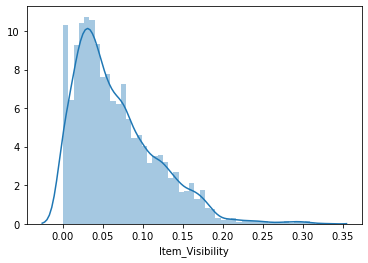

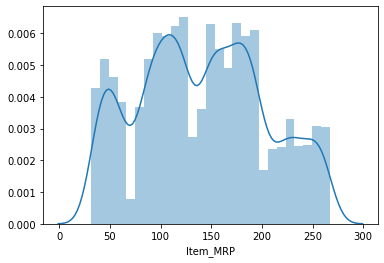

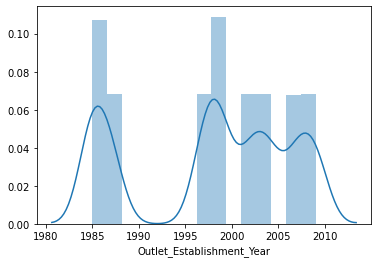

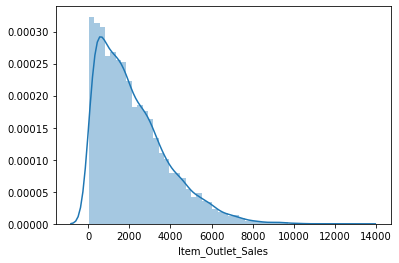

In [15]:
for i in df_bigmart.describe().columns:
    sns.distplot(df_bigmart[i])
    plt.show()

In [16]:
#combine item fat content
df_bigmart['Item_Fat_Content']=df_bigmart['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat': 'Low Fat'})
df_bigmart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

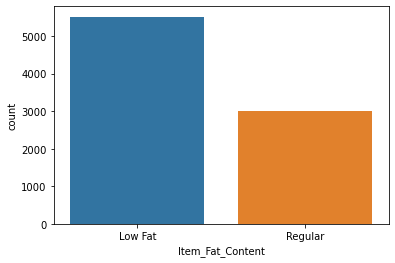

In [17]:
sns.countplot(df_bigmart["Item_Fat_Content"])

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

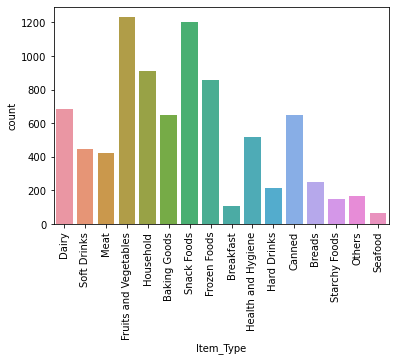

In [20]:
lab = list(df_bigmart['Item_Type'].unique())
chart = sns.countplot(df_bigmart["Item_Type"])
chart.set_xticklabels(labels=lab, rotation=90)

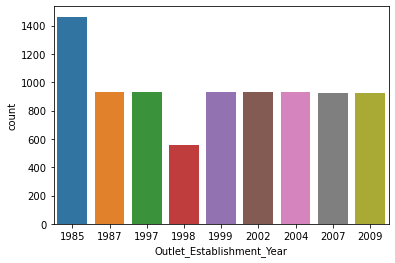

In [23]:
sns.countplot(df_bigmart["Outlet_Establishment_Year"])

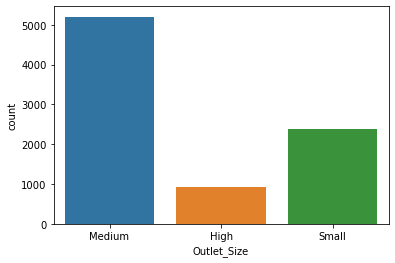

In [25]:
sns.countplot(df_bigmart["Outlet_Size"])

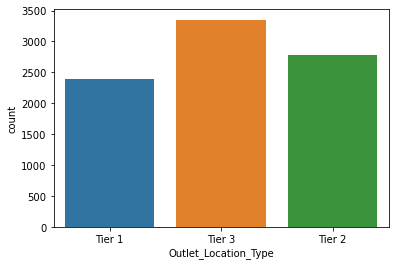

In [26]:
sns.countplot(df_bigmart["Outlet_Location_Type"])

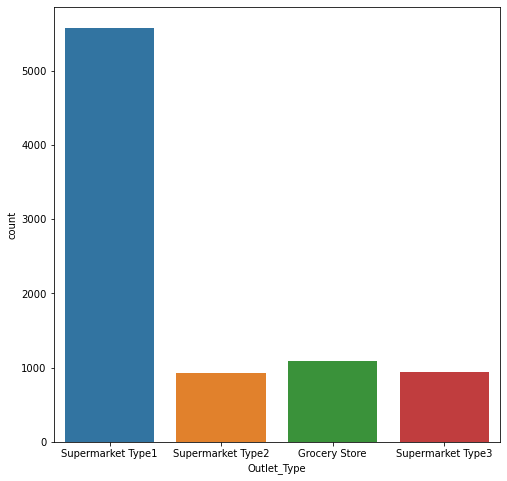

In [28]:
plt.figure(figsize=(8,8))
sns.countplot(df_bigmart["Outlet_Type"])
plt.show()

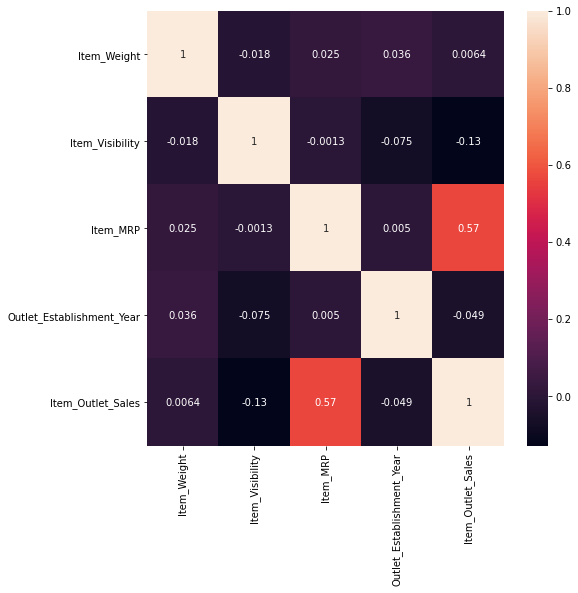

In [33]:
#co-relation graph
corr = df_bigmart.corr()
plt.figure(figsize=(8,8))
sns.heatmap(df_bigmart.corr(),annot=True)#cmap
plt.show()

# Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns=['Item_Identifier',
 'Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for val in columns:
    df_bigmart[val]=le.fit_transform(df_bigmart[val].astype(str))
df_bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.930,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8520,1357,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


Item_Identifier                 AxesSubplot(0.125,0.657941;0.133621x0.222059)
Item_Weight                  AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Item_Fat_Content              AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Item_Visibility              AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Item_Type                    AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Item_MRP                        AxesSubplot(0.125,0.391471;0.133621x0.222059)
Outlet_Identifier            AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Outlet_Establishment_Year     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Outlet_Size                  AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Outlet_Location_Type         AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Outlet_Type                        AxesSubplot(0.125,0.125;0.133621x0.222059)
Item_Outlet_Sales               AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

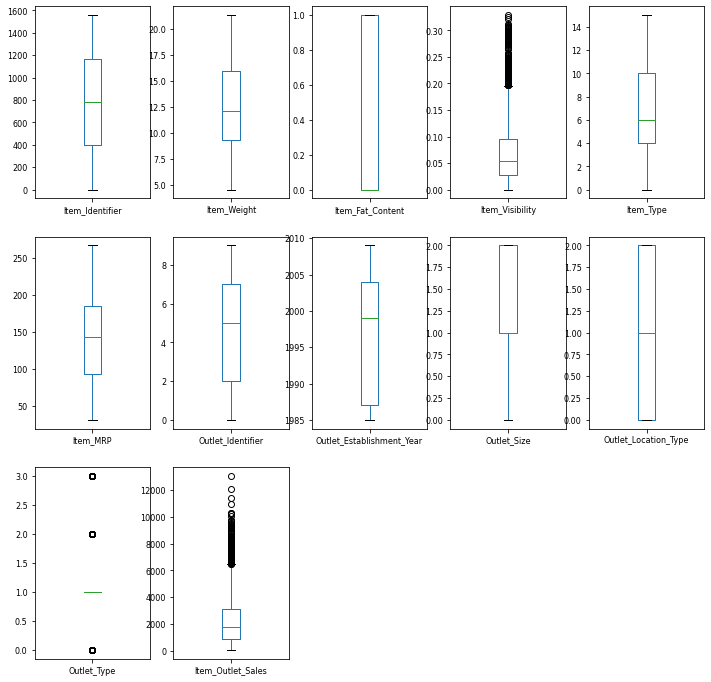

In [35]:
df_bigmart.plot(kind='box',subplots=True,layout=(3,5),fontsize=8,figsize=(12,12))

In [36]:
#remove outliers
from scipy.stats import zscore
z_score=abs(zscore(df_bigmart))
print(df_bigmart.shape)
df_bigmart_final=df_bigmart.loc[(z_score<3).all(axis=1)]
print(df_bigmart_final.shape)

(8523, 12)
(8338, 12)


In [37]:
df_bigmart.skew()

Item_Identifier             -0.008877
Item_Weight                  0.175321
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

In [43]:
#Saprating Target and input variable and drop some less important data columns 
df_x=df_bigmart_final.drop(columns=['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])
y=df_bigmart_final['Item_Outlet_Sales']

In [44]:
df_x.shape,y.shape

((8338, 9), (8338,))

In [45]:
#Scalling 
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [49]:
#again check skewness
x.skew()

Item_Weight                  0.168750
Item_Fat_Content             0.620973
Item_Visibility              0.794272
Item_Type                    0.098295
Item_MRP                     0.138990
Outlet_Establishment_Year   -0.423379
Outlet_Size                 -0.087933
Outlet_Location_Type        -0.202674
Outlet_Type                  0.956727
dtype: float64

# Model Training

In [50]:
#import libraries for model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=55)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
lr.coef_

array([   5.24061254,   20.90514546,  -61.91363774,    9.53898495,
        912.58754632,   36.41190655, -195.15215016, -340.65437319,
        725.36636756])

In [88]:
lr.intercept_

2137.465119580454

In [89]:
lr.score(x_train,y_train)

0.5002116089134361

In [90]:
pred=lr.predict(x_test)
print("Predicted result",pred)
print("actual result",y_test)

Predicted result [2728.80720704 1008.22750596 1120.21501181 ... 1769.65870703 3740.77723173
 1182.73339839]
actual result 4998    1810.9760
7657    2051.9956
2561     649.1550
1925    6114.7072
6138    1842.9344
          ...    
4675     708.4112
4246    1693.7952
4043     347.5476
8278    3430.2016
6001     703.0848
Name: Item_Outlet_Sales, Length: 2085, dtype: float64


In [91]:
print('error:')

print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 859.4157855008874
Mean squared error: 1251124.577795197
Root Mean Squared Error: 1118.5368021639686


In [92]:
print(r2_score(y_test,pred))

0.48483674418277645


In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=10,scoring="r2").mean()

0.4947882694887684